In [1]:
#Import core Python libraries for time handling, data manipulation, and visualization.
#In the written code of Baglini, he has imported EOD. I used yfinance in order to retrieve data

import datetime as dt
import matplotlib.pyplot as plt
from matplotlib import style
import pandas as pd
import yfinance as yf
import numpy as np
style.use('ggplot')


In [2]:
#I defined the start and end dates for the historical data extraction. 
start = dt.datetime(2019,12,1)
end = dt.datetime(2024,11,30)

#I downloaded market data for Alphabet Inc (ticker:GOOGL) from yahoo finance
# The 'auto_adjust=False' parameter has been used for the column display of Adj Close.
data = yf.download("GOOGL", start=start, end=end, auto_adjust=False)

#Display the first and last five rows of the dataset to verify successful data retrieval
print(data.head())
print(data.tail())

[*********************100%***********************]  1 of 1 completed

Price       Adj Close      Close       High        Low       Open    Volume
Ticker          GOOGL      GOOGL      GOOGL      GOOGL      GOOGL     GOOGL
Date                                                                       
2019-12-02  64.001587  64.443001  65.272003  64.018997  65.127998  26538000
2019-12-03  64.293564  64.737000  64.861504  63.852501  63.932999  25270000
2019-12-04  65.495277  65.946999  66.213501  65.152496  65.305000  35506000
2019-12-05  65.893524  66.348000  66.399002  65.716003  66.349998  24408000
2019-12-06  66.510765  66.969498  67.123497  66.561501  66.637497  32968000
Price        Adj Close       Close        High         Low        Open  \
Ticker           GOOGL       GOOGL       GOOGL       GOOGL       GOOGL   
Date                                                                     
2024-11-22  164.036591  164.759995  166.460007  163.899994  165.850006   
2024-11-25  166.913910  167.649994  168.630005  165.610001  166.089996   
2024-11-26  168.377457

In [3]:
#Computation of the daily logarithmic returns based on the adjusted closing prices as Baglini did in his written code

data['Log_Ret'] = np.log(data['Adj Close']/data['Adj Close'].shift(1))

print (data.head()['Log_Ret'])
print(data.tail()['Log_Ret'])

Date
2019-12-02         NaN
2019-12-03    0.004552
2019-12-04    0.018519
2019-12-05    0.006062
2019-12-06    0.009324
Name: Log_Ret, dtype: float64
Date
2024-11-22   -0.017269
2024-11-25    0.017389
2024-11-26    0.008730
2024-11-27    0.000650
2024-11-29   -0.001656
Name: Log_Ret, dtype: float64


In [4]:
#In the following 3 code lines there are calculations of rolling annualized volatility for different windows of 20,50 and 100d days
#Creation of a new column that will store the calculation of 20-day rolling volatility
data['Volatility20'] = data['Log_Ret'].rolling(window=20).std()*np.sqrt(252)
print(data['Volatility20'])


Date
2019-12-02         NaN
2019-12-03         NaN
2019-12-04         NaN
2019-12-05         NaN
2019-12-06         NaN
                ...   
2024-11-22    0.332779
2024-11-25    0.337232
2024-11-26    0.332629
2024-11-27    0.315918
2024-11-29    0.308807
Name: Volatility20, Length: 1258, dtype: float64


In [5]:
#Similar comments as above
data['Volatility50'] = data['Log_Ret'].rolling(window=50).std()*np.sqrt(252)
print(data['Volatility50'])


Date
2019-12-02         NaN
2019-12-03         NaN
2019-12-04         NaN
2019-12-05         NaN
2019-12-06         NaN
                ...   
2024-11-22    0.238086
2024-11-25    0.240873
2024-11-26    0.240993
2024-11-27    0.240958
2024-11-29    0.239083
Name: Volatility50, Length: 1258, dtype: float64


In [6]:
#Similar comments as above
data['Volatility100'] = data['Log_Ret'].rolling(window=100).std()*np.sqrt(252)
print(data['Volatility100'])

Date
2019-12-02         NaN
2019-12-03         NaN
2019-12-04         NaN
2019-12-05         NaN
2019-12-06         NaN
                ...   
2024-11-22    0.265769
2024-11-25    0.264028
2024-11-26    0.264259
2024-11-27    0.264271
2024-11-29    0.263490
Name: Volatility100, Length: 1258, dtype: float64


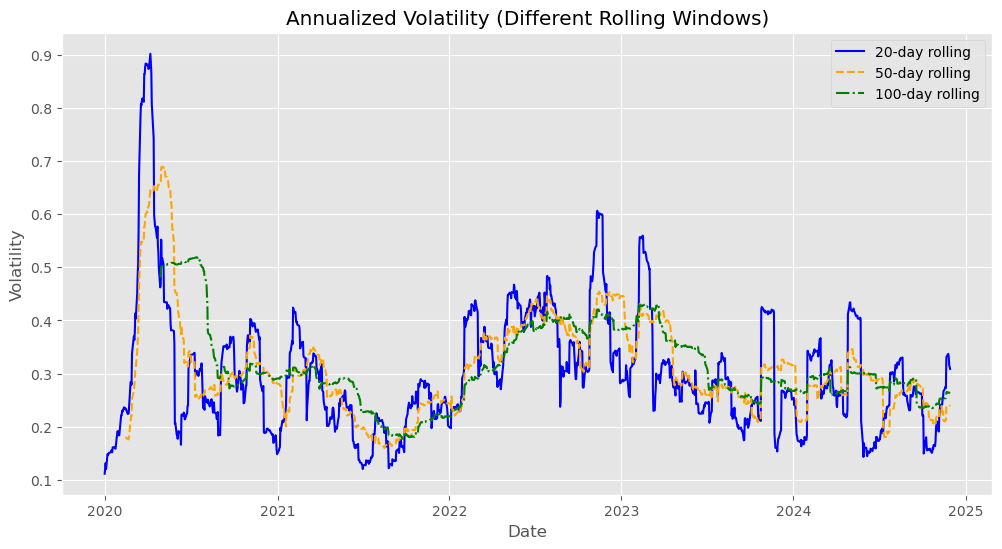

In [7]:
#Instead of using the plotly library as Baglini did, I imported and used matplotlib.
#I recreated the diagram that is appeared in the article of Medium for the annualized volatility for different rolling windows


plt.figure(figsize=(12,6))

#Plot of 20,50,100 day rolling volatility with the usage of different colors
plt.plot(data.index, data['Volatility20'], color='blue', linestyle='-', label='20-day rolling')
plt.plot(data.index, data['Volatility50'], color='orange', linestyle='--', label='50-day rolling')
plt.plot(data.index, data['Volatility100'], color='green', linestyle='-.', label='100-day rolling')

#Names for the title, x-label and y-label
plt.title('Annualized Volatility (Different Rolling Windows)')
plt.xlabel('Date')
plt.ylabel('Volatility')
plt.legend()
plt.grid(True)

plt.show()

In [9]:
#Definition of a function to calculate EWMA
#Computation of squared daily returns as a proxy for daily variance
#Initialization of an array to store the EWMA variance estimates
def EWMA_Volatility(rets, lam):
    sq_rets_sp500 = (rets**2).values
    EWMA_var = np.zeros(len(sq_rets_sp500))
    
    for r in range(1, len(sq_rets_sp500)):
        EWMA_var[r] = (1-lam)*sq_rets_sp500[r] + lam*EWMA_var[r-1]
        
#Convert daily variance into annualized volatility
    EWMA_vol = np.sqrt(EWMA_var*250)
    return pd.Series(EWMA_vol, index=rets.index, name ="EWMA Vol {}".format(lam))[1:]
    
#Calling the defined EMWA volatility function, creation of three different variables for the l
ewma99_googl = EWMA_Volatility(data['Log_Ret'], 0.99)
ewma97_googl = EWMA_Volatility(data['Log_Ret'], 0.97)
ewma90_googl = EWMA_Volatility(data['Log_Ret'], 0.90)

#Combination of all three EWMA series into one DataFrame for comparison and visualization
ewma_all = pd.DataFrame({'l=0.99': ewma99_googl, 'l=0.97': ewma97_googl, 'l=0.90': ewma90_googl},
                        index =ewma90_googl.index )

In [10]:
print(ewma_all.head())

              l=0.99    l=0.97    l=0.90
Date                                    
2019-12-03  0.007197  0.012466  0.022759
2019-12-04  0.030143  0.052180  0.095076
2019-12-05  0.031487  0.054006  0.095154
2019-12-06  0.034624  0.059001  0.101598
2019-12-09  0.034711  0.058573  0.097314


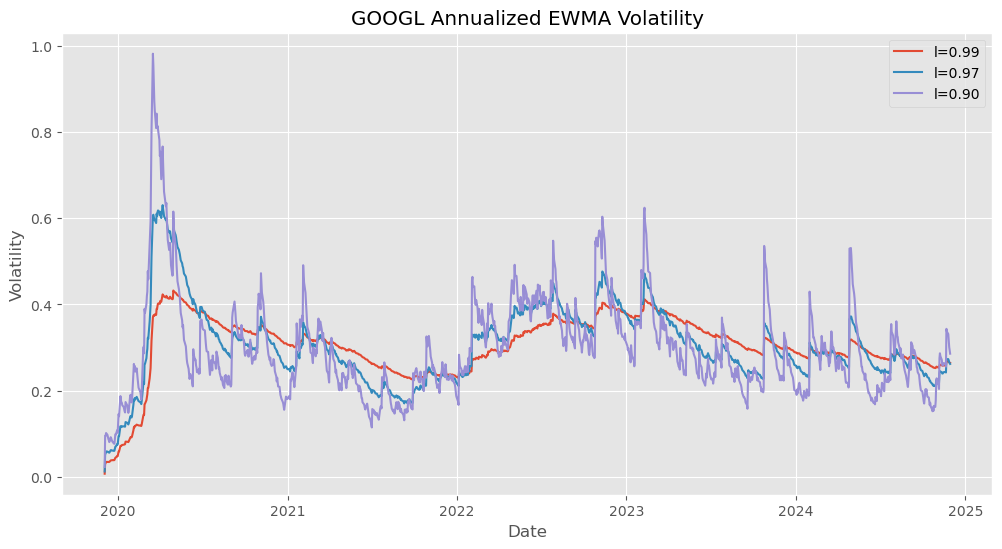

In [11]:
#Common graphical representation of annualized EMWA volatility for different l
plt.figure(figsize=(12,6))

# Loop through each EWMA volatility series and plot them on the same chart
for col in ewma_all.columns:
    plt.plot(ewma_all.index, ewma_all[col], label=col)

#Title, labels and legend
plt.title('GOOGL Annualized EWMA Volatility')
plt.xlabel('Date')
plt.ylabel('Volatility')
plt.legend()
plt.grid(True)
plt.show()

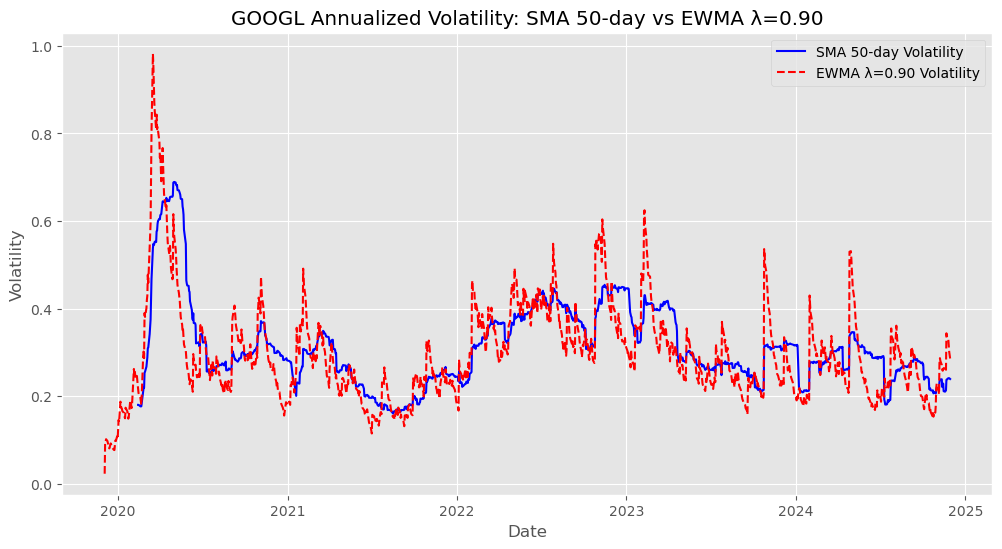

In [39]:
#Selection of two volatility measures for comparison in a graphical represenation
#Extraction of the 50-day rolling volatility column and EMWA 90 from the main data Dataframe and storage into a variable with the name sma50 and emwa90

sma50 = data['Volatility50']
ewma90 = ewma90_googl

plt.figure(figsize=(12,6))

#Plot of the 50-day rolling volatility
plt.plot(sma50.index, sma50, color='blue', linestyle='-', label='SMA 50-day Volatility')

#Plot the exponentially weighted volatility with λ=0.90
plt.plot(ewma90.index, ewma90, color='red', linestyle='--', label='EWMA λ=0.90 Volatility')


plt.title('GOOGL Annualized Volatility: SMA 50-day vs EWMA λ=0.90')
plt.xlabel('Date')
plt.ylabel('Volatility')
plt.legend()
plt.grid(True)